### <span style="color:#0ab49a">Занятие №9:</span> <span style="color:#BA77D8">Scipy, Sympy</span> 

![Текст картинки если файл картинки не найден](img/banner.png)

### <span style="color:#55628D">1. Линейная алгебра в Numpy</span>

In [328]:
import numpy as np

a = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]], dtype=np.float64)

print("A:\n", a)

A:
 [[ 6.  1.  1.]
 [ 4. -2.  5.]
 [ 2.  8.  7.]]


In [329]:
b = np.linalg.inv(a)
print("A⁻¹:\n", b)

A⁻¹:
 [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]


In [330]:
c = a @ b
print("AA⁻¹:\n", c)

AA⁻¹:
 [[ 1.00000000e+00  0.00000000e+00  2.77555756e-17]
 [-1.38777878e-17  1.00000000e+00  1.38777878e-17]
 [-4.16333634e-17  1.38777878e-16  1.00000000e+00]]


In [331]:
eigvals, eigvecs = np.linalg.eig(a)
for i, eigval in enumerate(eigvals):
    print("================")
    print("Cобственное значение λ:", eigval)
    print("Собственный вектор x:", eigvecs[:,i])
    print("Ax - λx =", a.dot(eigvecs[:, i]) - eigval * eigvecs[:, i])

Cобственное значение λ: 11.248623431365836
Собственный вектор x: [0.24511338 0.40622202 0.88028581]
Ax - λx = [-3.99680289e-15  1.77635684e-15 -1.77635684e-15]
Cобственное значение λ: 5.092850544301696
Собственный вектор x: [ 0.75669314 -0.03352363 -0.65291014]
Ax - λx = [-1.77635684e-15 -1.47104551e-15 -8.88178420e-16]
Cобственное значение λ: -5.341473975667527
Собственный вектор x: [ 0.02645665 -0.84078293  0.54072554]
Ax - λx = [9.43689571e-16 1.77635684e-15 0.00000000e+00]


### <span style="color:#55628D">2. Линейная алгебра в Scipy</span>

In [333]:
import numpy as np
from scipy import linalg

a = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]], dtype=np.float64)

print("A:\n", a)

A:
 [[ 6.  1.  1.]
 [ 4. -2.  5.]
 [ 2.  8.  7.]]


In [334]:
b = linalg.inv(a)
print("A⁻¹:\n", b)

A⁻¹:
 [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]


In [335]:
c = a @ b
print("AA⁻¹:\n", c)

AA⁻¹:
 [[ 1.00000000e+00  2.77555756e-17  1.38777878e-17]
 [ 9.71445147e-17  1.00000000e+00 -4.16333634e-17]
 [-1.52655666e-16  1.38777878e-16  1.00000000e+00]]


In [336]:
eigvals, eigvecs = linalg.eig(a)
for i, eigval in enumerate(eigvals):
    print("================")
    print("eigval:", eigval)
    print("eigvec:", eigvecs[:,i])
    print("delta:", a.dot(eigvecs[:, i]) - eigval * eigvecs[:, i])

eigval: (11.248623431365836+0j)
eigvec: [0.24511338 0.40622202 0.88028581]
delta: [-3.99680289e-15+0.j  1.77635684e-15+0.j -1.77635684e-15+0.j]
eigval: (5.092850544301696+0j)
eigvec: [ 0.75669314 -0.03352363 -0.65291014]
delta: [-1.77635684e-15+0.j -1.47104551e-15+0.j -8.88178420e-16+0.j]
eigval: (-5.341473975667527+0j)
eigvec: [ 0.02645665 -0.84078293  0.54072554]
delta: [9.43689571e-16+0.j 1.77635684e-15+0.j 0.00000000e+00+0.j]


### <span style="color:#55628D">3. Численное решение уравнений Scipy</span>

Решается уравнение: $$A\vec{x} = \vec{b}$$

In [339]:
import numpy as np
from scipy import linalg

a = np.array([[3, 2, 0],
              [1, -1, 0],
              [0, 5, 1]])

b = np.array([2, 4, -1])

x = linalg.solve(a, b)

print("Решение СЛАУ: x =", x)
print("Проверка решения: Ax - b =", a @ x - b)

Решение СЛАУ: x = [ 2. -2.  9.]
Проверка решения: Ax - b = [0. 0. 0.]


### <span style="color:#55628D">4. Преобразование Фурье</span>
$$\hat{f}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} f(x) \exp^{-ix\omega}dx$$

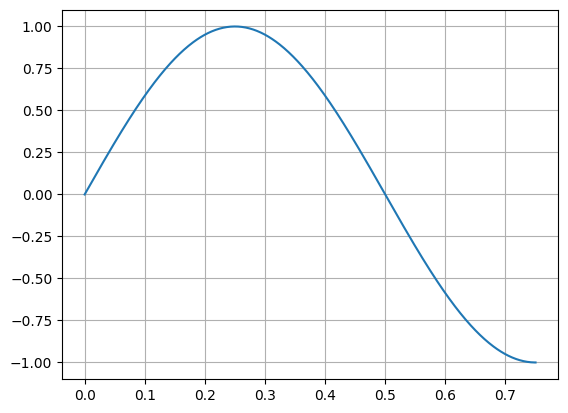

In [340]:
import numpy as np
import matplotlib.pyplot as plt

T = 1.0 / 800.0
N = 600

x = np.linspace(0.0, N * T, N)

# Простая функция
y = np.sin(2 * np.pi * x)

# Посмотрим на саму функцию
plt.plot(x, y)
plt.grid()
plt.show()

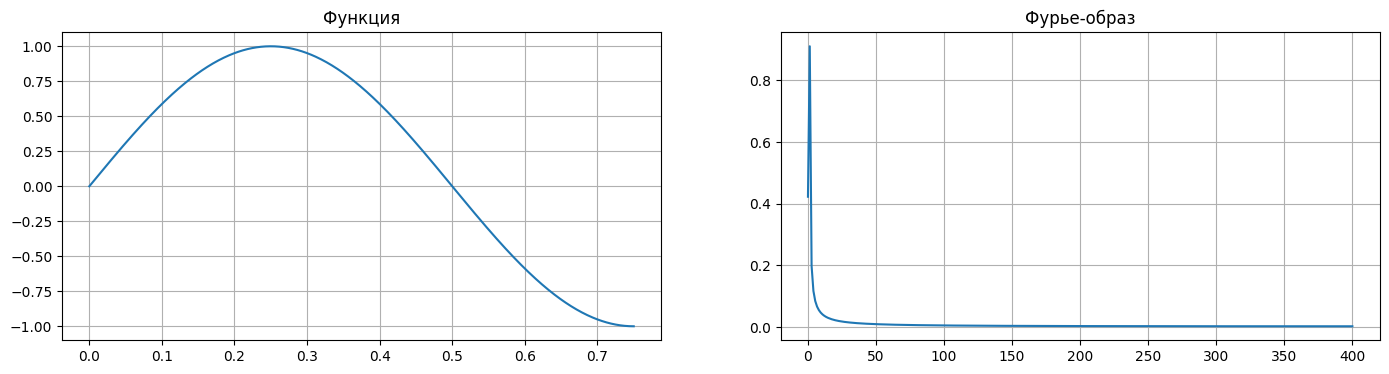

In [341]:
from scipy.fft import fft

# Получим Фурье и посмотрим спектр
def Fourier(x, y):
    fig, axs = plt.subplots(1, 2, figsize=(17, 4))
    
    axs[0].plot(x, y)
    axs[0].set_title("Функция")
    axs[0].grid()
    
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    y = 2.0/N * np.abs(yf[0:N//2])
    
    axs[1].plot(xf, y)
    axs[1].set_title("Фурье-образ")
    axs[1].grid()
    
    plt.show()
    
Fourier(x, y)

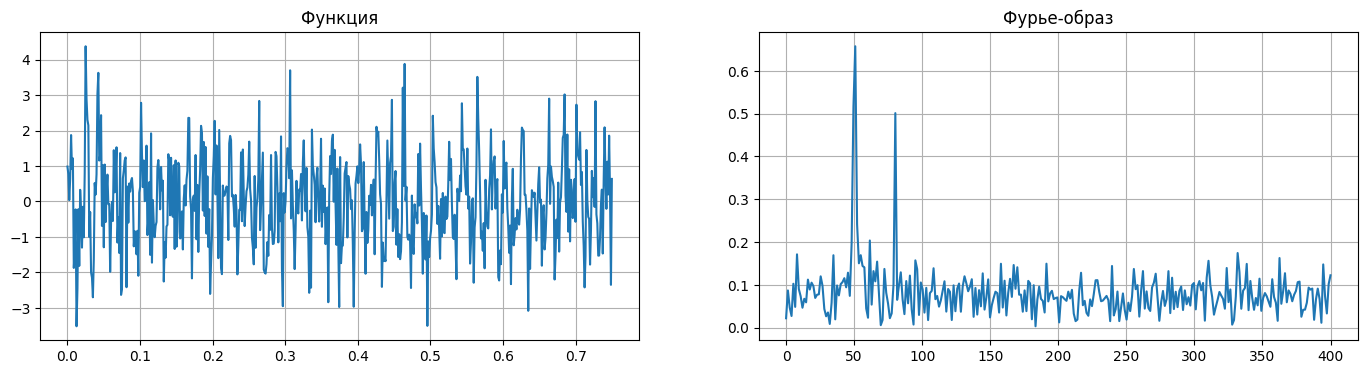

In [344]:
# Сложная функция плюс шум
rng = np.random.default_rng()
y_noise = rng.normal(size = x.size)
y = np.sin(100 * np.pi * x) + 0.5 * np.sin(160 * np.pi * x) + y_noise

Fourier(x, y)

### <span style="color:#55628D">5. Интерполяция</span>

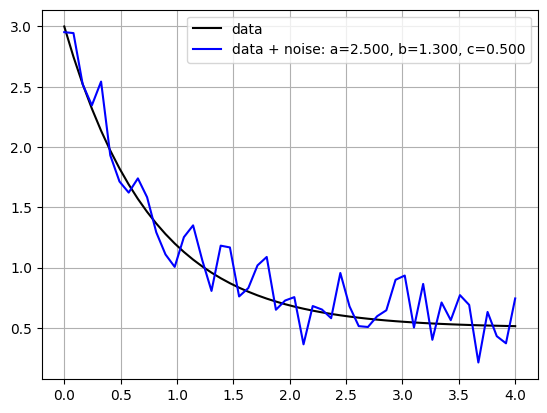

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Функция, которой описываются наши данные
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Настоящие значения параметров
real_params = [2.5, 1.3, 0.5] 

# Набор точек
xdata = np.linspace(0, 4, 50)
y = func(xdata, *real_params)

# Шум по оси OY в наших точках
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size = xdata.size)
ydata = y + y_noise

# Посмотрим на вид функции с шумом
plt.plot(xdata, y, 'k-', label='data')
plt.plot(xdata, ydata, 'b-', label='data + noise: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(real_params))
plt.grid()
plt.legend()
plt.show()

In [349]:
# Попросим определить параметры функции по точкам
params1, _ = curve_fit(func, xdata, ydata)
# Напечатаем и нарисуем результат
print(f"real_params: {real_params}")
print(f"params1: {params1}")

real_params: [2.5, 1.3, 0.5]
params1: [2.48642258 1.33842532 0.57829263]


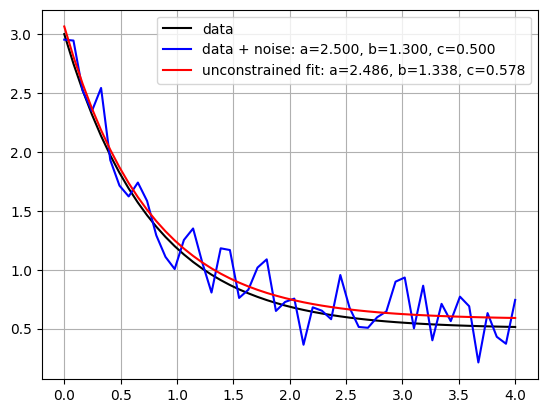

In [350]:
plt.plot(xdata, y, 'k-', label='data')
plt.plot(xdata, ydata, 'b-', label='data + noise: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(real_params))
plt.plot(xdata, func(xdata, *params1), 'r-', label='unconstrained fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(params1))
plt.legend()
plt.grid()
plt.show()

real_params: [2.5, 1.3, 0.5]
params1: [2.48642258 1.33842532 0.57829263]
params2: [2.48642291 1.33842631 0.57829289]


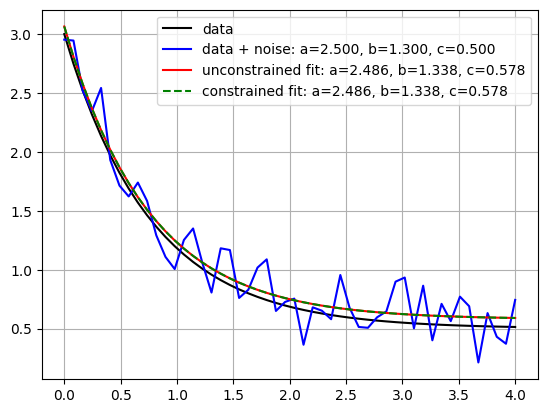

In [353]:
# Попросим определить параметры функции по точкам, добавив ограничений на диапазоны значений
params2, _ = curve_fit(func, xdata, ydata, bounds=(0, [3., 1.5, 0.7]))
# Напечатаем и нарисуем этот результат тоже
print(f"real_params: {real_params}")
print(f"params1: {params1}")
print(f"params2: {params2}")

plt.plot(xdata, y, 'k-', label='data')
plt.plot(xdata, ydata, 'b-', label='data + noise: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(real_params))
plt.plot(xdata, func(xdata, *params1), 'r-', label='unconstrained fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(params1))
plt.plot(xdata, func(xdata, *params2), 'g--', label='constrained fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(params2))

plt.grid()
plt.legend()
plt.show()

### <span style="color:#55628D">6. Знакомство с Sympy</span>

In [361]:
from sympy import symbols

x, y = symbols('alpha varphi')

a = x + y + x
a

2*alpha + varphi

In [362]:
a -= x
a

alpha + varphi

In [363]:
a += (5*y + 12)
a

alpha + 6*varphi + 12

In [364]:
print(a)

alpha + 6*varphi + 12


In [372]:
from sympy import var, Function

t = var('t')
y = Function('y')(t)

y

y(t)

### <span style="color:#55628D">7. Подстановка значений</span>

In [373]:
from sympy import symbols

x = symbols('x')

f = x**2 + 5*x + 1
print(f"Тип f: {type(f)}")
f

Тип f: <class 'sympy.core.add.Add'>


x**2 + 5*x + 1

In [376]:
anw1 = f.subs(x, 2)
anw2 = f.subs('x', 2)

print(anw1, type(anw1))
print(anw2, type(anw2))

15 <class 'sympy.core.numbers.Integer'>
15 <class 'sympy.core.numbers.Integer'>


In [379]:
anw3 = f.evalf(subs={x: 2})

print(anw3, type(anw3))
print((x + x + x).evalf(subs={x : 1}))

15.0000000000000 <class 'sympy.core.numbers.Float'>
3.00000000000000


In [382]:
import numpy as np

print(np.exp(anw3))

TypeError: loop of ufunc does not support argument 0 of type Float which has no callable exp method

In [385]:
help(anw4_func)

Help on function _lambdifygenerated:

_lambdifygenerated(x)
    Created with lambdify. Signature:
    
    func(x)
    
    Expression:
    
    x**2 + 5*x + 1
    
    Source code:
    
    def _lambdifygenerated(x):
        return x**2 + 5*x + 1
    
    
    Imported modules:



In [383]:
from sympy import lambdify

anw4_func = lambdify(x, f)
anw4 = anw4_func(x = 2)

print(anw4, type(anw4))
print(np.exp(anw4))

15 <class 'int'>
3269017.3724721107


### <span style="color:#55628D">8. Символьное решение уравнений</span>

#### <span style="color:#1DA398">8.1 Без параметров</span>

In [386]:
from sympy import symbols, Eq, solve

x = symbols('x')

f = x**2 + 5 * x + 1
e = Eq(f, 1)
print(e, type(e))
e

Eq(x**2 + 5*x + 1, 1) <class 'sympy.core.relational.Equality'>


Eq(x**2 + 5*x + 1, 1)

In [387]:
result = solve(e)
print(result)

[-5, 0]


In [388]:
for i, root in enumerate(result):
    print(f'корень {i}: {root}')

корень 0: -5
корень 1: 0


#### <span style="color:#1DA398">8.2 С параметром</span>

In [389]:
from sympy import symbols, Eq, solve

x = symbols('x')

a = symbols('a')
f2 = x**2 + a * a * x
e2 = Eq(f2, 0)
print(e2)
e2

Eq(a**2*x + x**2, 0)


Eq(a**2*x + x**2, 0)

In [390]:
result2_1 = solve(e2)

for i, root in enumerate(result2_1):
    print(f'корень {i}: {root}')

корень 0: {a: -sqrt(-x)}
корень 1: {a: sqrt(-x)}
корень 2: {x: 0}


In [393]:
a0 = 11

result2_2 = solve(e2, x)

for i, root in enumerate(result2_2):
    print(f'корень {i}: {root}')
    print(f'корень {i} для a = {a0}: {root.subs({a: a0})}\n')

корень 0: 0
корень 0 для a = 11: 0

корень 1: -a**2
корень 1 для a = 11: -121



### <span style="color:#0ab49a">Примечание №1.</span> <span style="color:#BA77D8">evalf vs subs</span> 
ref: https://stackoverflow.com/questions/50439037/what-exactly-is-the-subs-argument-of-the-evalf-method-of-sympy-expression-fo

In [394]:
x, y, z = symbols('x y z')

f = x + y - z

subses = {x: 1e100, 
          y: 1, 
          z: 1e100}

f.subs(subses)

0

In [395]:
f

x + y - z

In [396]:
f.evalf(subs=subses)

1.00000000000000

In [397]:
import time

n = int(1e4)

start_time = time.time()
for _ in range(n):
    tmp = f.subs(subses)
print(f"Время на subs: {time.time() - start_time} секунд")

start_time = time.time()
for _ in range(n):
    tmp = f.evalf(subs=subses)
print(f"Время на evalf: {time.time() - start_time} секунд")

Время на subs: 0.991213321685791 секунд
Время на evalf: 2.914346694946289 секунд


### <span style="color:#0ab49a">Примечание №2.</span> <span style="color:#BA77D8">Scipy.Optimize.Minimize</span> 

In [402]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x0 = np.random.uniform(-2, 2, 2)
print(f"x0: {x0}")

# func = lambda x: abs(x[0]) + abs(x[1])  # Нечто мини-максное
# func = lambda x: x[0]**2 + x[1]**2  # Параболоид
func = lambda x: np.sin(x[0] * 2) + np.cos(x[1] * 2) + 2  # Сложная функция

x_record, y_record, z_record = [], [], []
def callback(x):
    x_record.append(x[0])
    y_record.append(x[1])
    z_record.append(func(x))
callback(x0)

# Рассчёт
res = minimize(func, x0, method='TNC', callback=callback)  # , options={'ftol': 1e-10, 'disp': True})
print(f"Результат: x={res.x}, f={func(res.x)}")

x0: [-1.9534989  -0.00728958]
Результат: x=[ 2.35619452 -1.57079595], f=2.7977620220553945e-13


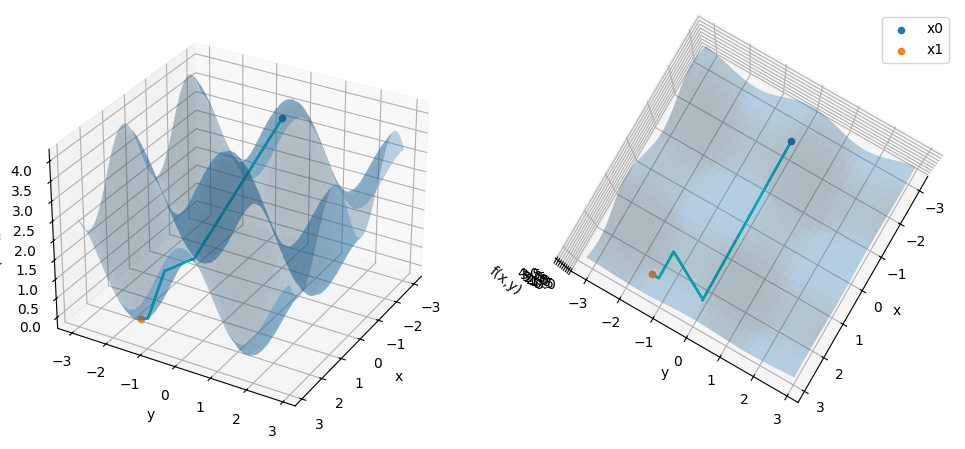

In [403]:
# Отрисовка
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 2, 1, projection = '3d'), fig.add_subplot(1, 2, 2, projection = '3d')

for v, view in enumerate([30, 85]):
    ax[v].view_init(view, 30)
    
    X = np.arange(-3, 3, 0.1)
    Y = np.arange(-3, 3, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = func([X, Y])
    surf = ax[v].plot_surface(X, Y, Z, alpha=0.3)
    
    for i, x in enumerate([x0, res.x]):
        ax[v].scatter(x[0], x[1], func(x), s=20, label=['x0', 'x1'][i])
    for i in range(len(record) - 1):
        ax[v].plot(x_record, y_record, z_record, c='c')
        
    ax[v].set_xlabel('x')
    ax[v].set_ylabel('y')
    ax[v].set_zlabel('f(x,y)')

plt.legend()
plt.show()

### <span style="color:#0ab49a">Примечание №3.</span> <span style="color:#BA77D8">Numpy.Random.default_rng</span> 

Время 1: 0.14484286308288574 секунд
Время 2: 0.22741484642028809 секунд

Стандартное отклонение: 1.000291324781458, |1 - std| = 0.0002913247814579911
Дисперсия: 1.0005827344330445, |1 - var| = 0.0005827344330444628
Мат ожидание: -0.00013885591707722244


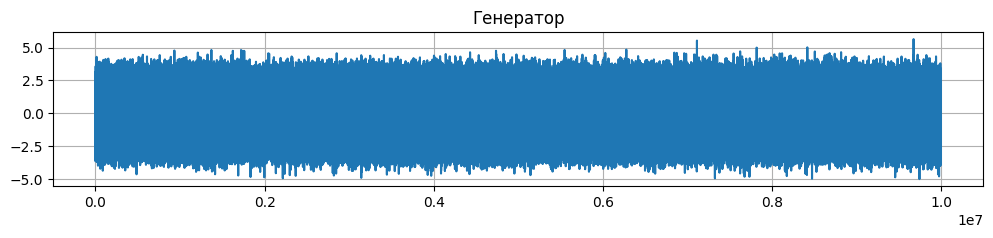

Стандартное отклонение: 1.000001264148596, |1 - std| = 1.2641485960251941e-06
Дисперсия: 1.0000025282987903, |1 - var| = 2.5282987903274545e-06
Мат ожидание: 5.3670549067932836e-05


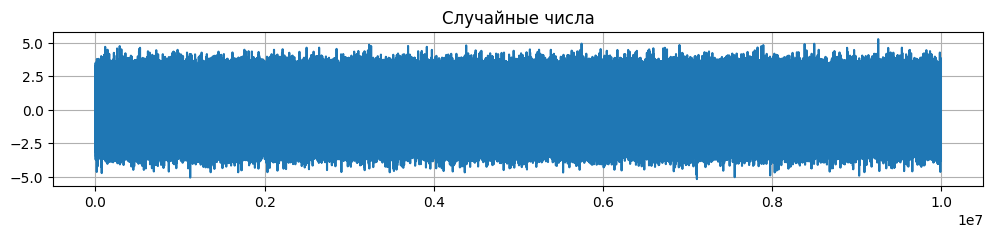

In [406]:
import numpy as np
import matplotlib.pyplot as plt

n = int(1e7)

rng = np.random.default_rng()

start_time = time.time()
y1 = rng.normal(size=n)
print(f"Время 1: {time.time() - start_time} секунд")

start_time = time.time()
y2 = np.random.normal(size=n)
print(f"Время 2: {time.time() - start_time} секунд\n")


for i in range(2):
    y = y1 if i==0 else y2

    print(f"Стандартное отклонение: {np.std(y)}, |1 - std| = {abs(1 - np.std(y))}")
    print(f"Дисперсия: {np.var(y)}, |1 - var| = {abs(1 - np.var(y))}")
    print(f"Мат ожидание: {np.mean(y)}")

    fig, ax = plt.subplots(figsize=(12, 2))
    ax.plot(range(n), y)
    ax.set_title(["Генератор", "Случайные числа"][i])
    ax.grid()
    plt.show()